# Gráficas "*más matemáticas*" en Python

Presentamos aquí algunos ejemplos y curiosidades relacionados con las gráficas de funciones de una variable en Python, todo ello desde un punto de vista matemático. Se asume que se está usando IPython Notebook con las bibliotecas numéricas habituales (numpy, scipy y matplotlib que están sintetizadas en el paquete pylab, cargado automáticamente en las distribuciones de Python científico). 

## 1. Gráficas usuales en Matplotlib

###  1.1 Una primera gráfica 

Matplotlib (http://matplotlib.org) es el nombre de la biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays. De cara al usuario, proporciona una interface (pylab) similar a la de MATLAB. Un ejemplo sencillo:

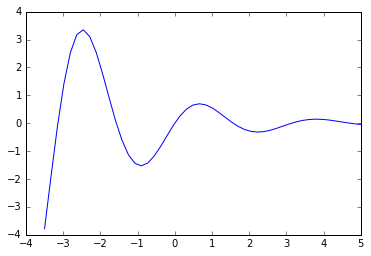

In [1]:
%matplotlib inline
from numpy import  *
from matplotlib.pyplot import *


def f(x): return sin(2*x)*exp(-x/2)
a, b = -3.5, 5 # Intervalo [a, b]
x = linspace(a, b) # Array (vector) de puntos equiespaciados en $[a,b]$
plot(x, f(x)) # Pintamos la poligonal que une los puntos $(x_i, f(x_i))$

### 1.2 Ejes de coordenadas cartesianas 
 
Si deseamos marcar los ejes cartesianos que pasan por el origen de coordenadas, la posibilidad más sencilla que consiste, en simplemente marcar las dos rectas perpendiculares en la gráfica anterior. Opcionalmente, podemos añadir una cuadrícula (grid) y cambiar color y ancho de línea:

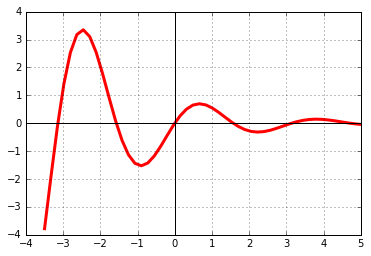

In [2]:
plot(x, f(x), color="red", linewidth=3)
axhline(color='black') # Eje horizontal (AXis Horizontal LINE)
axvline(color='black') # Eje vertical (AXis Vertical LINE)
grid()

### 1.3 Mejoras en la gráfica anterior

Por defecto, `linspace(a, b)` sólo produce 50 puntos equiespaciados y a veces se pueden apreciar "picos" en la poligonal. Si deseamos una gráfica más suave, podemos aumentar el número de puntos: `linspace(a, b, num)`. 

En la siguiente gráfica se añade además ún título y leyenda y se muestran las siguientes posibilidades:
+ Inserción de $\LaTeX$ ([ver documentación](http://matplotlib.org/users/mathtext.html))
+ Inserción de caracteres con tildes (anteponiendo *u*)
+ Abreviaturas, por ejemplo 
    + `color="black"` $\rightarrow$ `c="k"` (k proviene de blacK)
    + `linewidth=3"` $\rightarrow$ `lw=3`

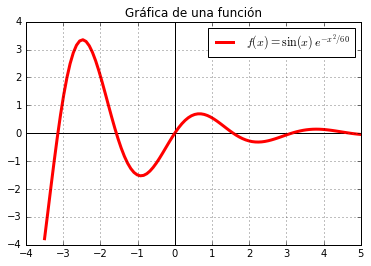

In [3]:
x = linspace(a, b, 100) # Aumentamos el número de puntos en [a,b]

# Gráfica de f:
axhline(c='k') # Eje horizontal (Color = blacK)
axvline(c='k') # Eje vertical (Color = blacK)
plot(x, f(x), c="r", lw=3, # Seleccionamos color y tamaño de línea 
	label=r"$f(x)=\sin(x)\, e^{-x^2/60}$") # Definimos una etiqueta (que se verá con 'legend')

# Título, leyenda y cuadrícula:
title(u"Gráfica de una función")
legend() # Mostrar leyenda
grid()

### 1.4. Gáficas tipo boceto

Recientemente (a partir de las versión 1.3 de de Matplotlib) se ha incorporado el siguiente estilo de gráficas, que pueden ser útiles si sólo deseamos esbozar la función. Se conocen como **[xkcd](http://matplotlib.org/1.3.1/api/pyplot_api.html#matplotlib.pyplot.xkcd)** en honor a las tiras de historietas https://www.xkcd.com ("*a webcomic of romance, sarcasm, math and language*"):

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS', 'StayPuft'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


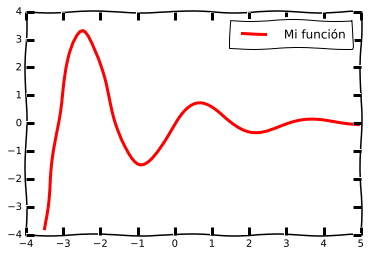

In [4]:
with xkcd(): # Dibujar con estilo xkcd (sólo las siguientes líneas)
    plot(x, f(x), color="red", linewidth=3, label=u"Mi función")
    legend()

## 2. Gráficas en las que sólo aparecen los ejes cartesianos

Aunque las gráficas usuales de Matplotlib son  claras y proporcionan toda la información
necesaria (de hecho son el tipo de  gráficas más común en ciencia e ingeniería), habitualmente 
los matemáticos nos preguntamos: ¿no se pueden hacer más sencillas, mostrando
**simplemente dos ejes de coordenadas cartesianas**, $x$ e $y$ (que pasan por el origen)?

Por supesto: `Matplotlib` es muy versátil (se puede ver una muestra de sus posibilides en en http://matplotlib.org/gallery.html). A continuación se presentan varias alternativas, empezando por la más sencilla.

### 2.1. Desactivación del sistema de ejes de Matplotlib

Para que aparezcan sólo los ejes cartesianos, lo más fácil es desactivar el sistema de ejes de matplotlib y pintar sólo las dos rectas perpendiculares correpondientes a los ejes $x$ e $y$. Si necesitamos alguna anotación, podemos usar funciones como  `text()` o `anotate()` (véase la [ayuda en internet](http://matplotlib.org//users/text_intro.html) y el siguiente ejemplo): 

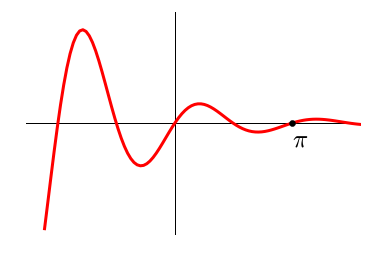

In [5]:
# Desactivar sistema de ejes
ax = gca() # Obtener un objeto que representa el sistema de ejes (Get Current Axis)
ax.axison = False # Hacer poner en "off"

# Pintar la gráfica
axhline(color='black') # Eje horizontal
axvline(color='black') # Eje vertical
plot (x, f(x), color="red", linewidth=3) # Dibujar la gráfica

# Opcional: marcar la posición de $\pi$
plot (pi, 0, "o", color="black") # Dibujar un punto en ($\pi,0)$
text (pi, -0.8, r"$\pi$", fontsize="25") # Dibujar $\pi$

Estas gráficas tan sencillas son muy apropiadas si deseamos usar bocetos (estilo xkcd):

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS', 'StayPuft'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


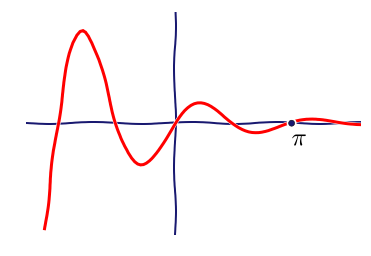

In [6]:
with xkcd():
    ax = gca() # Objeto que representa el sistema de ejes
    ax.axison = False # Desactivar el sistema de ejes
    axhline(color='midnightblue') # Eje horizontal
    axvline(color='midnightblue') # Eje vertical

    plot (x, f(x), color="red", linewidth=3) 
    
    # Opcional: marcar la posición de $\pi$
    plot (pi, 0, "o", color="midnightblue") # Dibujar un punto en $(\pi,0)$
    text (pi, -0.8, r"$\pi$", fontsize="25") # Dibujar $\pi$ en $(\pi, -0.8)$

### 2.2. Maniuplación del sistema de ejes de Matplotlib

Si las gráficas anteriores te parecen demasiado sencillas, sigue leyendo este documento, aunque (quien avisa no es traidor) *la complejidad irá en aumento* porque será necesario tener mayores conocimientos del sistema de ejes de matplotlib.

#### 2.2.1 Eliminacinación del "marco" que encuadra a la gráfica

En el siguiente ejemplo, hacemos invisibles los cuatro segementos (llamados "*spines*") que forman el "marco" que encuadra a la gráfica de la función, aunque mantenemos las marcas ("*ticks*") y (si lo deseamos) la cuadrícula ("*grid*"):

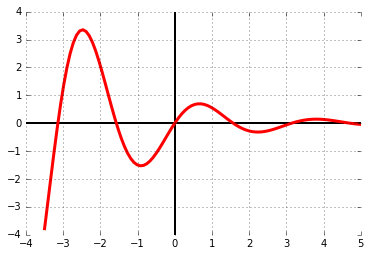

In [7]:
ax = gca() # Obtener el sistema de ejes actual (Get Current Axis)

# Hacer invisibles los 4 segmentos del marco (los 4 spines de los ejes)
for position in ['left', 'right', 'top', 'bottom']:
    ax.spines[position].set_visible(False)

# Dibujar líneas $y=0$ y $x=0$:
axhline(color='black', linewidth=2)
axvline(color='black', linewidth=2)

# Pintar la gráfica
plot (x, f(x), lw=3, color='r')
grid() # Opcional

#### 2.2.2 Dibujar las marcas junto a los ejes cartesianos (posibilidad 1)

Si deseamos que las marcas ("ticks") y las etiquetas numéricas estén situadas en los ejes coordenados, tendremos que trabajar más. Ya no nos vales pintar dos rectas perpendiculares, sino que tendremos que manipular los cuatro segmentos ("spines") que forman el marco de la gráfica:

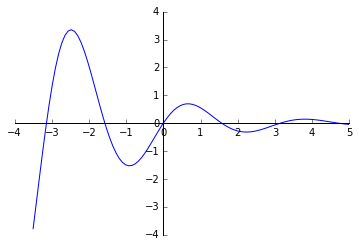

In [8]:
ax = gca() # Obtener el sistema de ejes actual

# Ocultar los "spines" superior y derecho
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Dibujar marcas ("ticks") sólo en spines inferior e izquierdo
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Mover al origen spines inferior e izquierdo
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.plot(x, f(x))

#### 2.2.2 Dibujar las marcas junto a los ejes cartesianos (posibilidad 2)

La segunda posibilidad consiste en importar el paquete `SubplotZero`, que se enarga precisamente de localizar los ejes cartesianos en el origen de coordenadas:

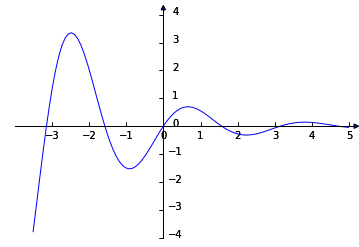

In [9]:
from mpl_toolkits.axes_grid.axislines import SubplotZero
fig = figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)
ax.axis["yzero"].major_ticklabels.set_rotation(-90) 

for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

plot(x, f(x))